In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import skimage
import SimpleITK as sitk

# Read in Original Images

In [2]:
relative_path_1 = "data/04_060__150_00_01_00C_230922_3D.tif"
relative_path_2 = "data/04_060_150_01_01_005_230920_3D.tif"
relative_path_3 = "data/04_060_150_01_04_008_230920_3D.tif"


img_1 = utils.read_image(relative_path_1)
img_2 = utils.read_image(relative_path_2)
img_3 = utils.read_image(relative_path_3)

## Convert to HSV

In [3]:
# create HSV images from full size RGB images
img_1_hsv = skimage.color.rgb2hsv(img_1)
img_2_hsv = skimage.color.rgb2hsv(img_2)
img_3_hsv = skimage.color.rgb2hsv(img_3)

## Isolate Hue Channel

In [4]:
img_1_hue = img_1_hsv[:, :, 0]
img_2_hue = img_2_hsv[:, :, 0]
img_3_hue = img_3_hsv[:, :, 0]

## Create Masks with Binary Threshold

In [5]:
hue_mask_1 = (img_1_hue < 0.2).astype(np.float32)
hue_mask_2 = (img_2_hue < 0.2).astype(np.float32)
hue_mask_3 = (img_3_hue < 0.2).astype(np.float32)

# Show Masks For Reference
#utils.print_images([hue_mask_1, hue_mask_2, hue_mask_3], True)

## Apply mask to Original Images

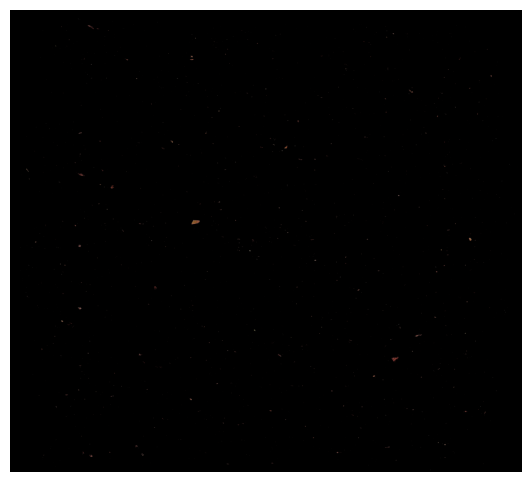

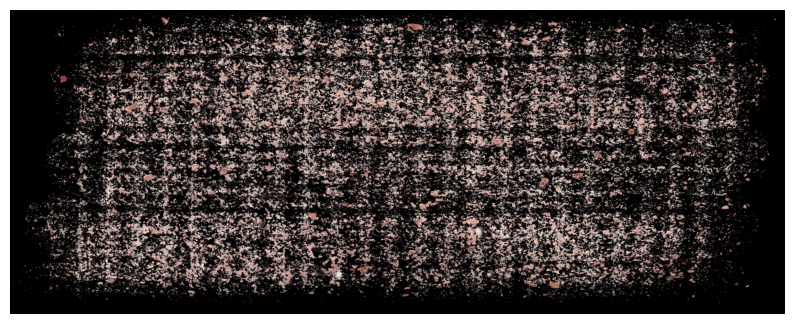

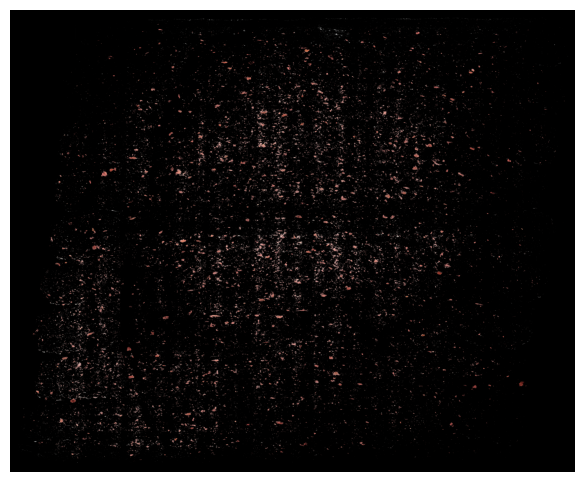

In [6]:

# Reshape hue_mask to have the same dimensions as img
hue_mask_1_resized = np.repeat(hue_mask_1[:, :, np.newaxis], 3, axis=2)
hue_mask_2_resized = np.repeat(hue_mask_2[:, :, np.newaxis], 3, axis=2)
hue_mask_3_resized = np.repeat(hue_mask_3[:, :, np.newaxis], 3, axis=2)


# element-wise multiplication to apply mask
masked_noise_1 = img_1 * hue_mask_1_resized
masked_noise_2 = img_2 * hue_mask_2_resized
masked_noise_3 = img_3 * hue_mask_3_resized

# show resulting image
utils.print_image(masked_noise_1)
utils.print_image(masked_noise_2)
utils.print_image(masked_noise_3)

## Output to files

In [7]:
# Convert Masks to Images
#masked_noise_img_1 = sitk.GetImageFromArray(masked_noise_1)

# define output filepaths
#output_path_1 = "01_00C_mask.tif"
#output_path_2 = "01_005_mask.tif"
#output_path_3 = "04_008_mask.tif"

# create a writer object
#writer = sitk.ImageFileWriter()

# Set File Names and Execute
#writer.SetFileName(output_path_1)
#writer.Execute(masked_noise_img_1)

#print(type(masked_noise_img_1))